# Support Vector Machine (SVM)

Simple SVM for classification.

## 1. Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
nb_samples = 1000
dim_features = 2

data1 = np.random.normal([2,2], [1,2], (nb_samples,dim_features))
data2 = np.random.normal([-2,-2], [1,2], (nb_samples,dim_features))

label1 = np.ones(nb_samples) # positive
label2 = - np.ones(nb_samples) # negative

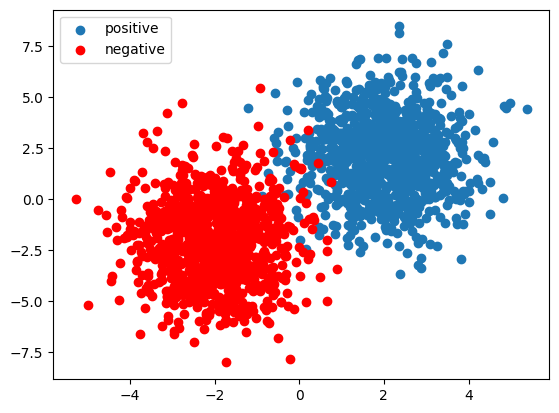

In [3]:
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1], c='r')
plt.legend(['positive', 'negative'])

In [4]:
X = np.concatenate([data1, data2])
y = np.concatenate([label1, label2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We want to find a hyperplan that linearly separate the data such as $wx-b=0$ and we predict the label as $y=sign(wx-b)$.

We need to minimize the euclidian distance $\|w\|=\sqrt{\sum^D_{j=1}(w^{(j)})^2}$ such that:
- $wx_i-b\geq1$ if $y_i=+1$
- $wx_i-b\leq-1$ if $y_i=-1$

## 2. Training functions

In [6]:
def svm(w, x, b):
    return np.dot(x, w) - b

In [7]:
# Hinge loss
def hinge_loss(y_true, y_pred):
    loss = 0
    for i in range(len(y_true)):
        loss += max(0, 1 - y_true[i] * y_pred[i])
    return loss / len(y_true)

In [16]:
def grad_w(x, y, w, b):
    n = x.shape[0]
    gradient = np.zeros_like(w)
    
    for i in range(n):
        if y[i] * (np.dot(x[i], w) + b) < 1:
            # For misclassified points
            gradient += -y[i] * x[i]
    return gradient / n

In [17]:
def grad_b(x, y, w, b):
    n = x.shape[0]
    gradient = 0
    
    for i in range(n):
        if y[i] * (np.dot(x[i], w) + b) < 1:
            # For misclassified points
            gradient += y[i]
    return gradient / n

In [34]:
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.5)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Generate grid points
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    # Calculate decision boundary (w.x + b = 0)
    Z = np.dot(xy, w) + b
    Z = Z.reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

## 3. Training

In [23]:
iterations = 100
w = np.random.random(dim_features)
b = np.random.random()
alpha = 0.1

for i in range(iterations):
    y_pred = svm(w, X_train, b)
    loss = hinge_loss(y_train, y_pred)
    print(f'Iteration {i+1}: loss = {loss:.4f}')
    w = w - alpha * grad_w(X_train, y_train, w, b)
    b = b - alpha * grad_b(X_train, y_train, w, b)

Iteration 1: loss = 0.3827
Iteration 2: loss = 0.2715
Iteration 3: loss = 0.2148
Iteration 4: loss = 0.1805
Iteration 5: loss = 0.1558
Iteration 6: loss = 0.1378
Iteration 7: loss = 0.1233
Iteration 8: loss = 0.1124
Iteration 9: loss = 0.1035
Iteration 10: loss = 0.0961
Iteration 11: loss = 0.0899
Iteration 12: loss = 0.0846
Iteration 13: loss = 0.0801
Iteration 14: loss = 0.0763
Iteration 15: loss = 0.0733
Iteration 16: loss = 0.0708
Iteration 17: loss = 0.0687
Iteration 18: loss = 0.0668
Iteration 19: loss = 0.0653
Iteration 20: loss = 0.0640
Iteration 21: loss = 0.0629
Iteration 22: loss = 0.0619
Iteration 23: loss = 0.0609
Iteration 24: loss = 0.0601
Iteration 25: loss = 0.0593
Iteration 26: loss = 0.0586
Iteration 27: loss = 0.0580
Iteration 28: loss = 0.0574
Iteration 29: loss = 0.0569
Iteration 30: loss = 0.0564
Iteration 31: loss = 0.0560
Iteration 32: loss = 0.0555
Iteration 33: loss = 0.0551
Iteration 34: loss = 0.0547
Iteration 35: loss = 0.0544
Iteration 36: loss = 0.0540
I

In [40]:
y_pred = svm(w, X_test, b)

In [41]:
loss_test = hinge_loss(y_test, y_pred)

In [42]:
print(f'Test Hinge loss: {loss_test:.4f}')

Test Hinge loss: 0.0426


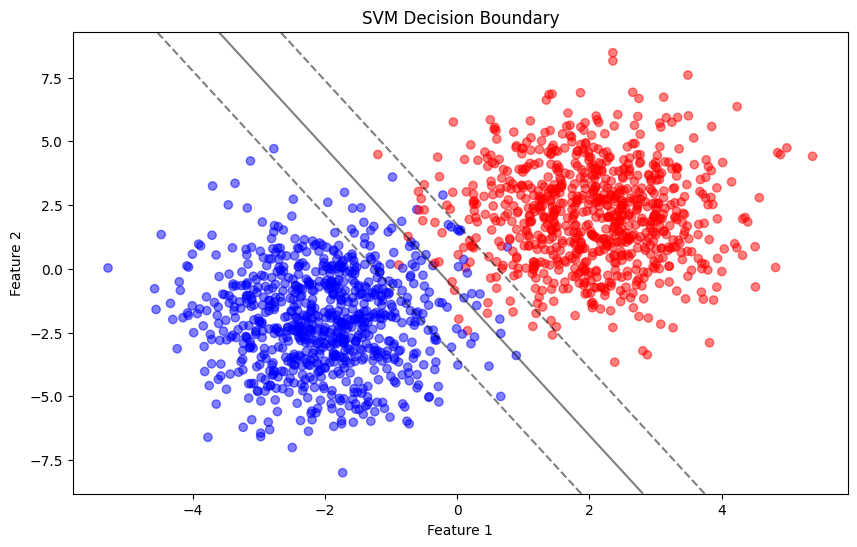

In [35]:
plot_decision_boundary(X_train, y_train, w, b)

## 4. Comparison with scikit-learn

In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC()

In [38]:
svc.fit(X_train, y_train)

SVC()

In [39]:
y_test_sk = svc.predict(X_test)

In [44]:
loss_test_sk = hinge_loss(y_test, y_test_sk)

In [45]:
print(f'Test Hinge loss: {loss_test:.4f}')

Test Hinge loss: 0.0426


In [46]:
print(f'Loss difference between our model and scikit-learn model: {loss_test - loss_test_sk}')

Loss difference between our model and scikit-learn model: 0.017642105686117286
